In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
from extreme_classification.extreme_dataset import BivariateLogisticDataset
from extreme_classification.extreme_classifier import ExtremeClassifier

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_dataset = BivariateLogisticDataset(
    sizes=[5000, 5000],
    alphas=[0.1, 0.5],
    labels=[0, 1],
)

test_dataset = BivariateLogisticDataset(
    sizes=[50000, 50000],
    alphas=[0.1, 0.5],
    labels=[0, 1],
)

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf = RandomForestClassifier(n_estimators=200)
extreme_classifier = ExtremeClassifier(model=rf, n_classes=2, n_features=2)

extreme_classifier.fit(train_dataset, k=100)

scores = []
hamming_losses = []

kappas = np.linspace(0.1, 1, 20).astype(np.float32)

for kappa in kappas:
    scores.append(extreme_classifier.score(test_dataset, percentage=kappa))
    hamming_losses.append(extreme_classifier.hamming_loss(test_dataset, percentage=kappa))

Text(0.5, 1.0, 'Hamming Loss for different values of kappa')

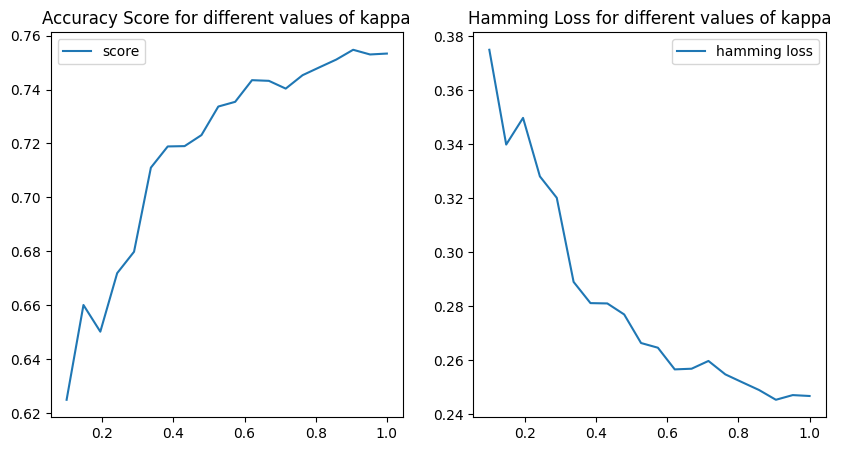

In [26]:

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(kappas, scores, label="score")
plt.legend()
plt.title("Accuracy Score for different values of kappa")

plt.subplot(1, 2, 2)
plt.plot(kappas, hamming_losses, label="hamming loss")
plt.legend()
plt.title("Hamming Loss for different values of kappa")